In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
from tqdm import tqdm
import tensorflow as tf
import time 
import warnings
warnings.filterwarnings("ignore")
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import math

# EDA

## BASIC

In [2]:
filepath = "/content/drive/Shareddrives/TNT/정규세션/2021년 2학기/산업인공지능/TASK2-wafer map /LSWMD.pkl"

In [3]:
df=pd.read_pickle(filepath)

In [4]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [5]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


In [6]:
df.info() # Non-null dataset - > FALSE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [7]:
df.describe() # Wafer Index := The order of the wafer at arbitrary lot

,dieSize,waferIndex
count,811457.000000,811457.000000
mean,1840.998585,12.961207
std,2254.987374,7.207489
min,3.000000,1.000000
25%,710.000000,7.000000
50%,953.000000,13.000000
75%,1902.000000,19.000000
max,48099.000000,25.000000


## lot name & Wafer Index

In [8]:
## Domain Knowledge : 25 wafers == 1 lot
df["lotName"].value_counts() # For Each LotName, Wafer Index Ranges From 1 to 25

lot24535    25
lot39350    25
lot26088    25
lot37729    25
lot24232    25
            ..
lot31519     1
lot32891     1
lot31563     1
lot27140     1
lot17156     1
Name: lotName, Length: 46293, dtype: int64

In [9]:
df["waferIndex"].value_counts() 
# 'waferIndex' and 'lotName' is as same as index of the data == meaningless 

6.0     32745
4.0     32714
5.0     32701
7.0     32672
2.0     32663
8.0     32650
11.0    32637
9.0     32636
3.0     32621
12.0    32598
10.0    32586
1.0     32516
13.0    32381
16.0    32362
14.0    32353
18.0    32333
17.0    32333
21.0    32320
22.0    32312
15.0    32301
20.0    32290
19.0    32285
23.0    32202
24.0    32197
25.0    32049
Name: waferIndex, dtype: int64

In [10]:
data = df.iloc[:,[0,1,4,5]]
data

,waferMap,dieSize,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]]
...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,[],[]


## Train Test Label

In [11]:
print(data["trianTestLabel"][0])
print(data["trianTestLabel"][0][0])
print(data["trianTestLabel"][0][0][0]) ## array nested structure

[['Training']]
['Training']
Training


In [12]:
print("The Number of Training Data : ",(data["trianTestLabel"] == "Training").sum()) 
print("The Number of Test Data : ",(data["trianTestLabel"] == "Test").sum())
print("The Number of NONE Data : ",data.shape[0]-(data["trianTestLabel"] == "Test").sum() - (data["trianTestLabel"] == "Training").sum()) 

The Number of Training Data :  54355
The Number of Test Data :  118595
The Number of NONE Data :  638507


## Failure Type

### from the data description

811,457 wafer maps collected from 46,393 lots in real-world fabrication

Here lists all defects type in this dataset:

Center, Donut, Edge-Loc, Edge-Ring, Loc, Random, Scratch, Near-full, none.

In [13]:
failtype = ['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Random', 'Scratch', 'Near-full']
labeltype = ['Training', 'Test']
data['FAILTYPE'] = '0'
data['LABEL'] = '0'

for tp in failtype:
  data.loc[data['failureType'] == tp,'FAILTYPE'] = tp
data = data.loc[(data.FAILTYPE!= '0')].drop('failureType', axis = 1)

for tp in labeltype:
  data.loc[data['trianTestLabel'] == tp,'LABEL'] = tp
data = data.loc[(data.LABEL != '0')].drop('trianTestLabel', axis = 1).reset_index(drop = True)

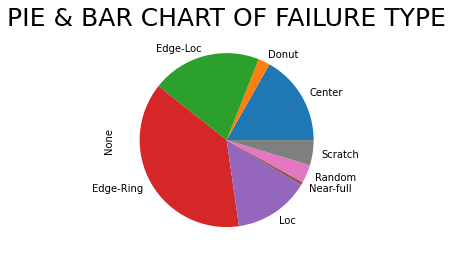

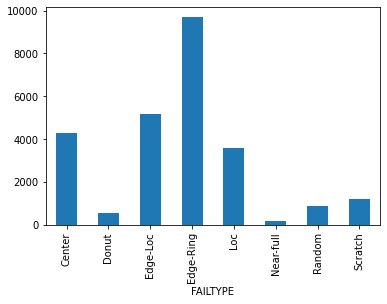

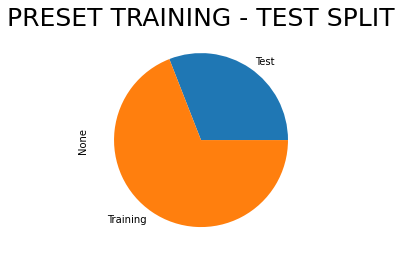

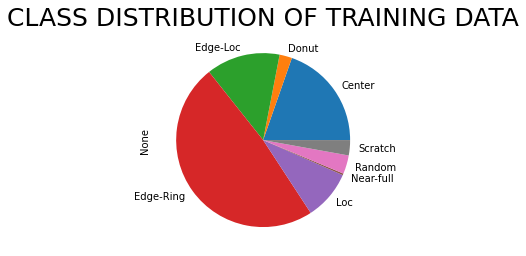

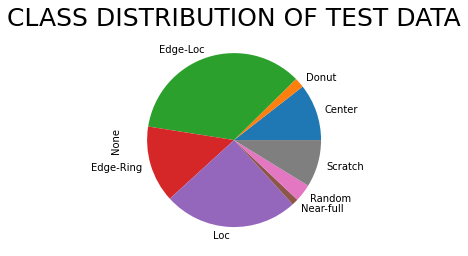

In [14]:
data.groupby("FAILTYPE").size().plot.pie()
plt.title('PIE & BAR CHART OF FAILURE TYPE', fontdict = {'fontsize' : 25})
plt.show()
data.groupby("FAILTYPE").size().plot.bar()
plt.show()
print('\n')
data.groupby("LABEL").size().plot.pie()
plt.title("PRESET TRAINING - TEST SPLIT", fontdict = {'fontsize' : 25})
plt.show()
data.loc[(data["LABEL"] == "Training"),:].groupby("FAILTYPE").size().plot.pie()
plt.title("CLASS DISTRIBUTION OF TRAINING DATA", fontdict = {'fontsize' : 25})
plt.show()
data.loc[(data["LABEL"] == "Test"),:].groupby("FAILTYPE").size().plot.pie()
plt.title("CLASS DISTRIBUTION OF TEST DATA", fontdict = {'fontsize' : 25})
plt.show()
## PRESET data split is meaningless!

In [15]:
data = data.drop('LABEL',axis = 1).drop('dieSize', axis = 1)

In [16]:
data

,waferMap,FAILTYPE
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Loc
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Edge-Loc
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Edge-Loc
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Edge-Loc
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Edge-Loc
...,...,...
25514,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",Edge-Loc
25515,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",Edge-Loc
25516,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",Edge-Ring
25517,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",Edge-Loc


## Visualization

In [17]:
sample = data.sample(25)

In [18]:
WAFER = sample.waferMap.values
LB = sample.FAILTYPE.values

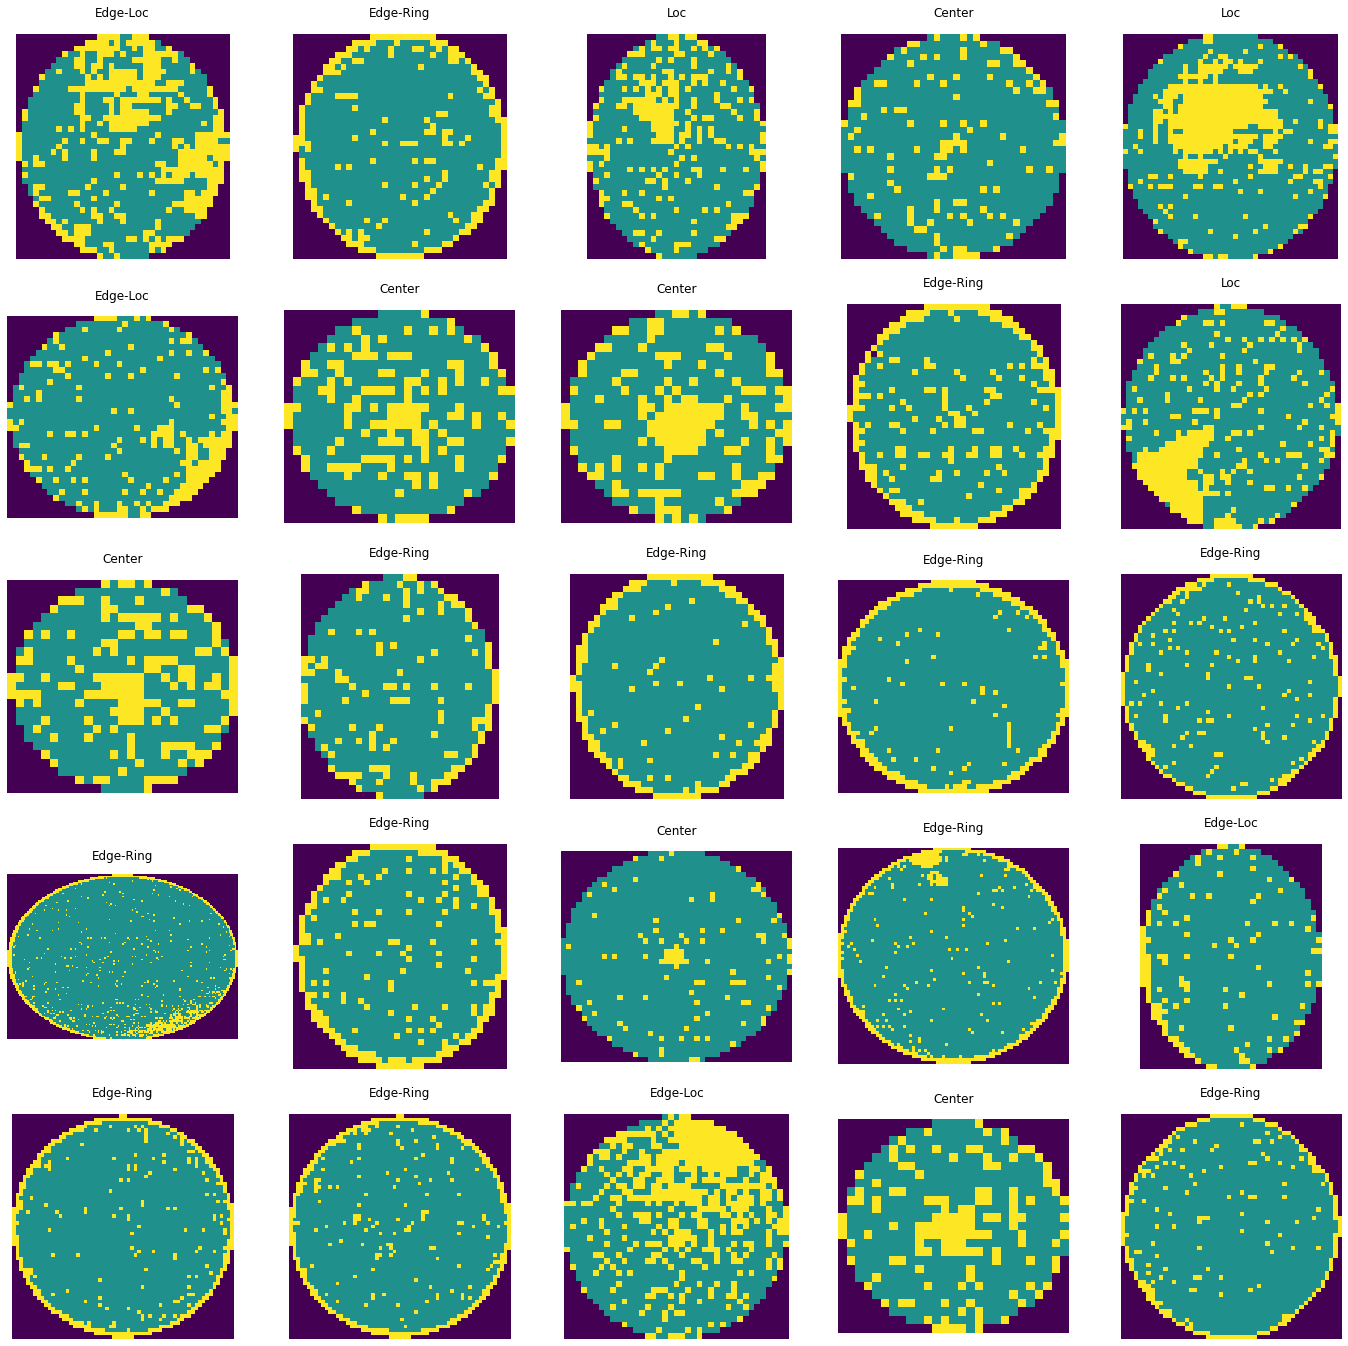

In [19]:
rows = 5
cols = 5
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(24, 24))
for i, wf in enumerate(WAFER):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.matshow(wf)
  ax.axis('off')
  ax.set_title(LB[i])
# Not every data is square wafer

# DATA Augmentation

In [20]:
import cv2
def cubic_resize(x):
  resized_x = cv2.resize(x, dsize=(width, width), interpolation=cv2.INTER_CUBIC) # BICUBIC INTERPOLATION
  # 이미지 확대 시에는 바이큐빅 / 선형 보간을 사용하는게 효과가 좋다. 
  return resized_x

def linear_resize(x):
  resized_x = cv2.resize(x, dsize=(width, width), interpolation=cv2.INTER_AREA) # LINEAR INTERPOLATION
  return resized_x

def average_filter(x):
  filtered = cv2.blur(x, (1, 1))
  return filtered

def find_dim(x):
    dim0=np.size(x,axis=0)
    dim1=np.size(x,axis=1)
    return dim0,dim1

def vis(x,y,z, label):
  fig = plt.figure(figsize=(8, 24))
  
  ax1 = fig.add_subplot(1, 3, 1)
  ax2 = fig.add_subplot(1, 3, 2)
  ax3 = fig.add_subplot(1, 3, 3)
  ax1.matshow(x)
  ax1.axis("off")
  ax1.set_title("Original of " + str(label))
  ax2.matshow(y)
  ax2.axis("off")
  ax2.set_title("Linear of " + str(label))
  ax3.matshow(z)
  ax3.axis("off")
  ax3.set_title("Cubic of " + str(label))
  plt.show()

data['waferMapDim']=data.waferMap.apply(find_dim)

In [21]:
data.groupby("waferMapDim").size().sort_values(ascending=False)[:20]
# size는 48 * 48 가 좋겠어.
width = 48

In [22]:
data['linear_resized_wafer']=data.waferMap.apply(linear_resize).apply(average_filter)
data['cubic_resized_wafer']=data.waferMap.apply(cubic_resize).apply(average_filter)

In [23]:
data

,waferMap,FAILTYPE,waferMapDim,linear_resized_wafer,cubic_resized_wafer
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Loc,"(45, 48)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Edge-Loc,"(53, 58)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Edge-Loc,"(53, 58)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Edge-Loc,"(53, 58)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",Edge-Loc,"(53, 58)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...,...,...
25514,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2,...",Edge-Loc,"(26, 30)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
25515,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",Edge-Loc,"(26, 30)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
25516,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",Edge-Ring,"(26, 30)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
25517,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",Edge-Loc,"(26, 30)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [24]:
number_of_sample = 15
sample = data.sample(number_of_sample)
WAFER = sample.waferMap.values
LINEAR = sample.linear_resized_wafer.values
CUBIC = sample.cubic_resized_wafer.values
LB = sample.FAILTYPE.values

In [25]:
images = data.cubic_resized_wafer.values
labels = data.FAILTYPE.values
X = np.zeros((len(images), width, width))
for i in range(len(images)):
  X[i,:,:] = images[i]
X = X.reshape((-1, width , width , 1))
print(X.shape)
print(labels.shape)

(25519, 48, 48, 1)
(25519,)


In [26]:
images = data.cubic_resized_wafer.values
labels = data.FAILTYPE.values
X = np.zeros((len(images), width, width))
for i in range(len(images)):
  X[i,:,:] = images[i]
X = X.reshape((-1, width, width, 1))
print(X.shape)
print(labels.shape)

(25519, 48, 48, 1)
(25519,)


In [27]:
faulty_case = np.unique(labels)
faulty_case_dict =dict()
for i, f in enumerate(faulty_case) :
    print('{} : {}'.format(f, len(labels[labels==f])))
    faulty_case_dict[i] = f

Center : 4294
Donut : 555
Edge-Loc : 5189
Edge-Ring : 9680
Loc : 3593
Near-full : 149
Random : 866
Scratch : 1193


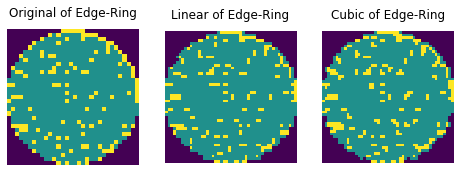

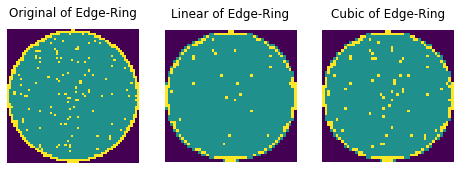

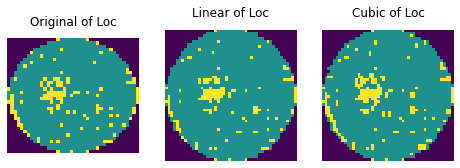

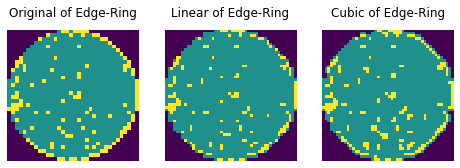

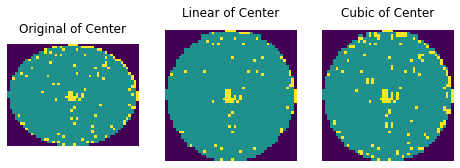

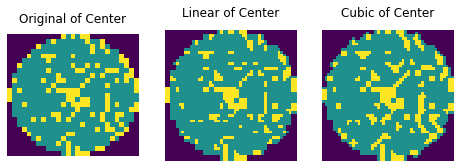

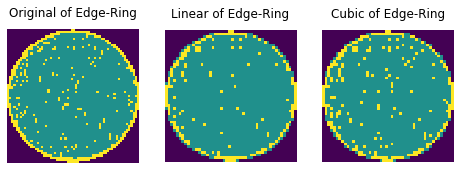

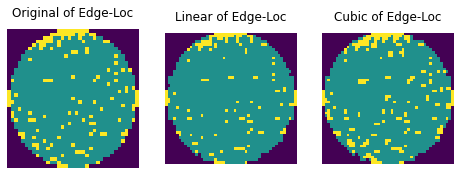

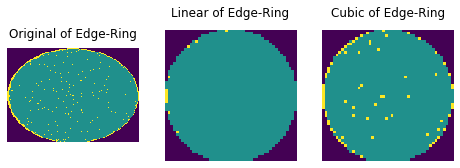

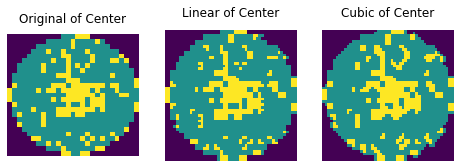

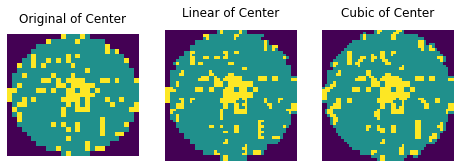

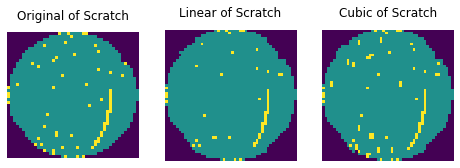

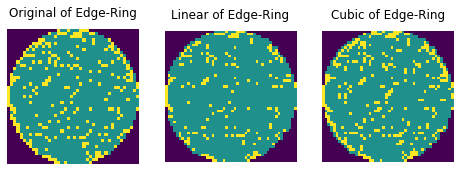

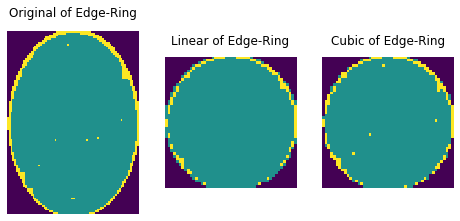

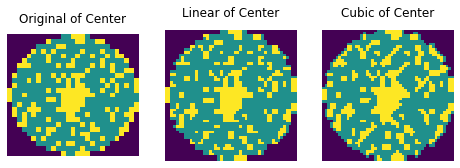

In [28]:
number_of_sample = 15
sample = data.sample(number_of_sample)
WAFER = sample.waferMap.values
LINEAR = sample.linear_resized_wafer.values
CUBIC = sample.cubic_resized_wafer.values
LB = sample.FAILTYPE.values
for i in range(number_of_sample):
  vis(WAFER[i], LINEAR[i], CUBIC[i], LB[i])

In [29]:
new_x = np.zeros((X.shape[0], width, width, 3))

for w in range(X.shape[0]):
    for i in range(width):
        for j in range(width):
            new_x[w, i, j, int(X[w, i, j])-1] = 1 # np where 로 최적화 가능할 듯

In [30]:
print(new_x.shape)

(25519, 48, 48, 3)


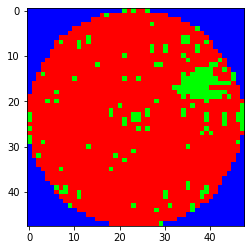

In [31]:
plt.imshow(new_x[0])
plt.show()

In [32]:
faulty_case = np.unique(labels)
faulty_case_dict =dict()
for i, f in enumerate(faulty_case) :
    print('{} : {}'.format(f, len(labels[labels==f])))
    faulty_case_dict[i] = f

Center : 4294
Donut : 555
Edge-Loc : 5189
Edge-Ring : 9680
Loc : 3593
Near-full : 149
Random : 866
Scratch : 1193


In [33]:
# train test split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
x_train, x_test, y_train, y_test = train_test_split(new_x, encoded_labels, test_size=0.3, shuffle=True, stratify=encoded_labels, random_state=42)
unaugmented_x_train = x_train
unaugmented_y_train = y_train

## CAE

In [34]:
import tensorflow as tf
from tensorflow import keras
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))
X_train = x_train.astype(np.float32)

In [35]:
conv_encoder = keras.models.Sequential([
  keras.layers.Reshape([width,width,3], input_shape = [width,width,3]),                                      
  keras.layers.Conv2D(16, kernel_size = 3, padding = 'same', activation = 'selu'),
  keras.layers.MaxPool2D(pool_size = 2),
  keras.layers.Conv2D(32, kernel_size = 3, padding = 'same', activation = 'selu'),
  keras.layers.MaxPool2D(pool_size = 2),
  keras.layers.Conv2D(64, kernel_size = 3, padding = 'same', activation = 'selu'),
  keras.layers.MaxPool2D(pool_size = 2)
])
conv_decoder = keras.models.Sequential([
  keras.layers.Conv2DTranspose(32, kernel_size = 3, padding = 'same', activation = 'selu', strides = 2, input_shape = [6,6,64]),
  keras.layers.Conv2DTranspose(16, kernel_size = 3, padding = 'same', activation = 'selu', strides = 2),
  keras.layers.Conv2DTranspose(3, kernel_size = 3, padding = 'same', activation = 'sigmoid', strides = 2),
  keras.layers.Reshape([width,width,3]) 
])
conv_encoder.compile

Convolutional_AutoEncoder = keras.models.Sequential([conv_encoder, conv_decoder])
Convolutional_AutoEncoder.compile(loss="binary_crossentropy",
                   optimizer='adam', metrics=[rounded_accuracy])
Convolutional_AutoEncoder.summary()
Convolutional_AutoEncoder.fit(X_train, X_train, epochs = 5, shuffle = True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 6, 6, 64)          23584     
_________________________________________________________________
sequential_1 (Sequential)    (None, 48, 48, 3)         23523     
Total params: 47,107
Trainable params: 47,107
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
559/559 [==============================] - 11s 4ms/step - loss: 0.2218 - rounded_accuracy: 0.9051
Epoch 2/5
559/559 [==============================] - 2s 4ms/step - loss: 0.1696 - rounded_accuracy: 0.9284
Epoch 3/5
559/559 [==============================] - 2s 4ms/step - loss: 0.1537 - rounded_accuracy: 0.9347
Epoch 4/5
559/559 [==============================] - 2s 4ms/step - loss: 0.1437 - rounded_accuracy: 0.9388
Epoch 5/5
559/559 [==============================] - 2s 4ms/step - loss: 0.1365 - r

In [36]:
y_train = encoder.inverse_transform(y_train)

In [37]:
# augment function define
def gen_data(wafer, label, AutoEncoder):
  encoder, decoder = AutoEncoder.layers
  encoded_x = encoder.predict(wafer)
  gen_x = np.zeros((1, width, width, 3))

  for i in range((8000//len(wafer))):
    noised_encoded_x = encoded_x + np.random.normal(loc=0, scale=0.1, size = (len(encoded_x), 6, 6, 64)) 
    noised_gen_x = decoder.predict(noised_encoded_x)
    gen_x = np.concatenate((gen_x, noised_gen_x), axis=0)
  gen_y = np.full((len(gen_x)), label)
    
  return gen_x[1:], gen_y[1:]

In [38]:
for f in faulty_case : 
    
    gen_x, gen_y = gen_data(x_train[np.where(y_train==f)[0]], f, Convolutional_AutoEncoder)
    y_train = np.concatenate((y_train, gen_y))
    x_train = np.concatenate((x_train, gen_x), axis=0)
    

In [39]:
x_train.shape

(76537, 48, 48, 3)

In [40]:
y_train = encoder.transform(y_train)

In [41]:
faulty_case = np.unique(y_train)
faulty_case_dict =dict()
print("Train dataset")
for i, f in enumerate(faulty_case) :
    print('{} : {}'.format(f, len(y_train[y_train==f])))
    faulty_case_dict[i] = f

Train dataset
0 : 9018
1 : 8169
2 : 10896
3 : 13552
4 : 10060
5 : 8008
6 : 8484
7 : 8350


In [42]:
faulty_case = np.unique(y_test)
faulty_case_dict =dict()
print("Test dataset")
for i, f in enumerate(faulty_case) :
    print('{} : {}'.format(f, len(y_test[y_test==f])))
    faulty_case_dict[i] = f

Test dataset
0 : 1288
1 : 166
2 : 1557
3 : 2904
4 : 1078
5 : 45
6 : 260
7 : 358


# Classifier

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, shuffle=True, stratify=y_train, random_state=42)

In [44]:
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(100000).batch(batch_size, drop_remainder = True).prefetch(1)
valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).shuffle(100000).batch(batch_size, drop_remainder = True).prefetch(1)
temp = tf.data.Dataset.from_tensor_slices((unaugmented_x_train, unaugmented_y_train)).shuffle(100000).batch(batch_size, drop_remainder = True)
unaugmented_train_dataset = temp.skip(100).prefetch(1)
unaugmented_valid_dataset = temp.take(100).prefetch(1)

callbacks = [tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=0
),
tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=4, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)]

## BASIC CNN

In [45]:
classifier = keras.models.Sequential([
  keras.layers.Conv2D(32,5,activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001),
                      input_shape = [width,width,3]),
  keras.layers.MaxPool2D(2),
  keras.layers.Conv2D(64,3,activation = 'relu', kernel_initializer = 'he_normal', padding = 'same', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001)),
  keras.layers.MaxPool2D(2),
  keras.layers.Conv2D(128,3,activation = 'relu', kernel_initializer = 'he_normal',  padding = 'same', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001)),
  keras.layers.MaxPool2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(9, activation = 'softmax')
])
classifier.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics='accuracy')
classifier.summary()
history = classifier.fit(train_dataset, epochs = 30, validation_data=valid_dataset, callbacks = callbacks)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 48, 48, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)             

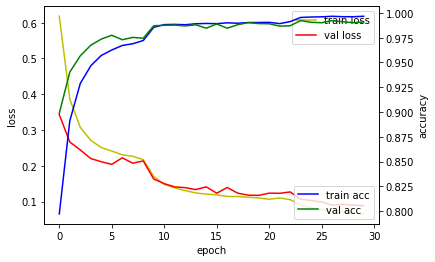

In [46]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
hist = history
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='rigth')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='left')

plt.show()

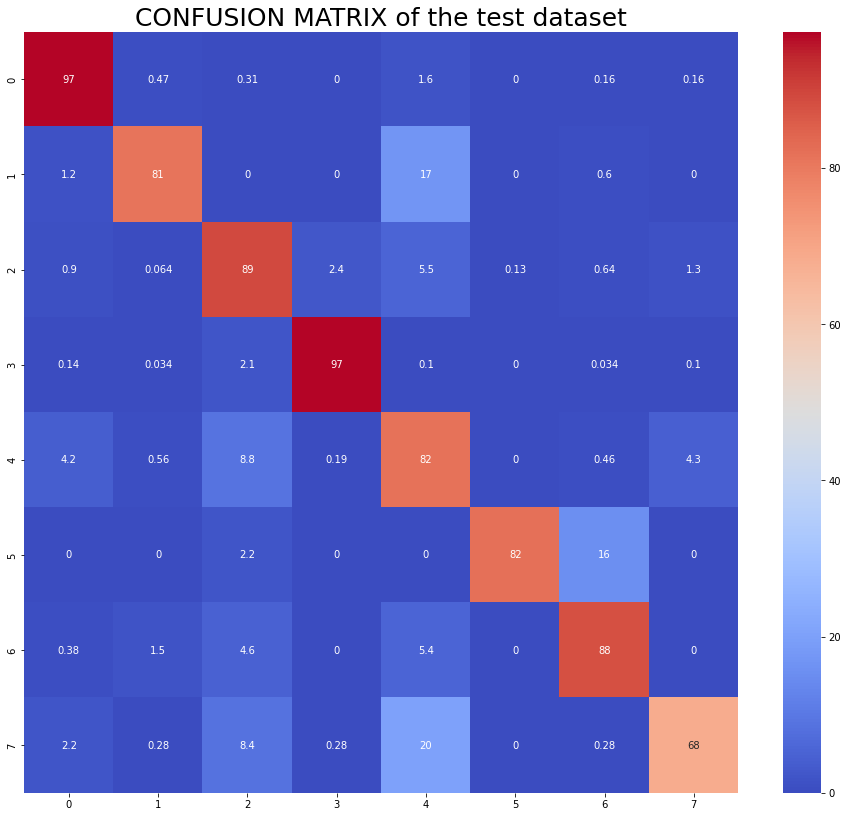

In [48]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = classifier.predict(x_test)
plt.figure(figsize=(16,14))
sns.heatmap(confusion_matrix(encoder.inverse_transform(y_true), 
                             encoder.inverse_transform(y_pred.argmax(axis=1)), 
                             normalize = 'true')*100, annot = True, cmap='coolwarm')
plt.title("CONFUSION MATRIX of the test dataset", fontsize=25)
plt.show()

In [49]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred.argmax(axis=1), average = None)
# MUCH BETTER THAN THE BASELINE MODEL
# MORE AUGMENTED, MORE OVERFITTED!!!

array([0.9587156 , 0.84375   , 0.8815497 , 0.98025632, 0.80642202,
       0.88095238, 0.8875969 , 0.72511144])

## BASIC CNN without Augmentation

In [ ]:
classifier_withoutaug = keras.models.Sequential([
  keras.layers.Conv2D(32,5,activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001),
                      input_shape = [width,width,3]),
  keras.layers.MaxPool2D(2),
  keras.layers.Conv2D(64,3,activation = 'relu', kernel_initializer = 'he_normal', padding = 'same', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001)),
  keras.layers.MaxPool2D(2),
  keras.layers.Conv2D(128,3,activation = 'relu', kernel_initializer = 'he_normal',  padding = 'same', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001)),
  keras.layers.MaxPool2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(9, activation = 'softmax')
])
classifier_withoutaug.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics='accuracy')
classifier_withoutaug.summary()
history_withoutaug = classifier_withoutaug.fit(unaugmented_train_dataset, epochs = 30, validation_data=unaugmented_valid_dataset, callbacks = callbacks)

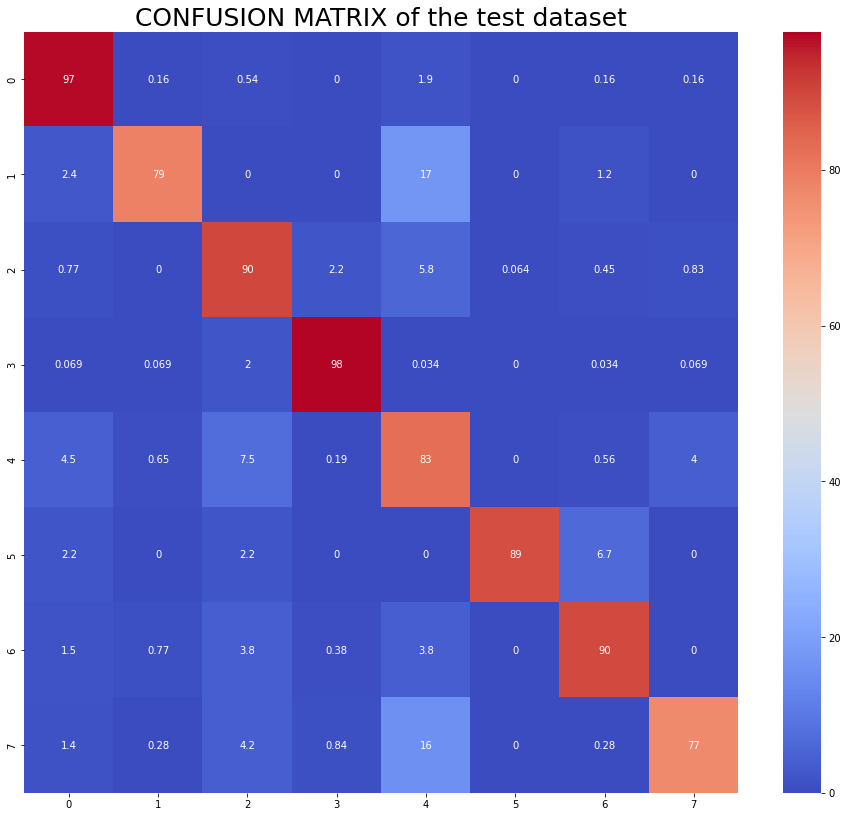

In [51]:
y_true = y_test
y_pred = classifier_withoutaug.predict(x_test)
plt.figure(figsize=(16,14))
sns.heatmap(confusion_matrix(encoder.inverse_transform(y_true), 
                             encoder.inverse_transform(y_pred.argmax(axis=1)), 
                             normalize = 'true')*100, annot = True, cmap='coolwarm')
plt.title("CONFUSION MATRIX of the test dataset", fontsize=25)
plt.show()

In [52]:
f1_score(y_true, y_pred.argmax(axis=1), average = None)

array([0.95678776, 0.84244373, 0.89443378, 0.98167358, 0.8170564 ,
       0.93023256, 0.90485437, 0.79538905])

## Augmented : Random Flip

In [54]:
classifier_filp = keras.models.Sequential([
  keras.layers.RandomFlip(),
  keras.layers.Conv2D(32,5,activation = 'relu', padding = 'same', kernel_initializer = 'he_normal', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001),
                      input_shape = [width,width,3]),
  keras.layers.MaxPool2D(2),
  keras.layers.Conv2D(64,3,activation = 'relu', kernel_initializer = 'he_normal', padding = 'same', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001)),
  keras.layers.MaxPool2D(2),
  keras.layers.Conv2D(128,3,activation = 'relu', kernel_initializer = 'he_normal',  padding = 'same', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001)),
  keras.layers.MaxPool2D(2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation = 'relu', kernel_initializer = 'he_normal', kernel_regularizer=tf.keras.regularizers.L2(l2=0.0001)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(9, activation = 'softmax')
])
classifier_filp.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics='accuracy')
classifier_filp.summary()
history_filp = classifier_filp.fit(unaugmented_train_dataset, epochs = 30, validation_data=unaugmented_valid_dataset, callbacks = callbacks)

Epoch 1/30
458/458 [==============================] - 3s 6ms/step - loss: 0.8764 - accuracy: 0.7091 - val_loss: 0.4741 - val_accuracy: 0.8438
Epoch 2/30
458/458 [==============================] - 3s 6ms/step - loss: 0.5524 - accuracy: 0.8200 - val_loss: 0.4163 - val_accuracy: 0.8641
Epoch 3/30
458/458 [==============================] - 3s 5ms/step - loss: 0.4890 - accuracy: 0.8437 - val_loss: 0.3832 - val_accuracy: 0.8766
Epoch 4/30
458/458 [==============================] - 3s 6ms/step - loss: 0.4446 - accuracy: 0.8615 - val_loss: 0.3324 - val_accuracy: 0.9028
Epoch 5/30
458/458 [==============================] - 3s 6ms/step - loss: 0.4168 - accuracy: 0.8720 - val_loss: 0.3245 - val_accuracy: 0.9097
Epoch 6/30
458/458 [==============================] - 3s 6ms/step - loss: 0.3913 - accuracy: 0.8835 - val_loss: 0.3088 - val_accuracy: 0.9153
Epoch 7/30
458/458 [==============================] - 3s 6ms/step - loss: 0.3721 - accuracy: 0.8936 - val_loss: 0.2884 - val_accuracy: 0.9200
Epoch 

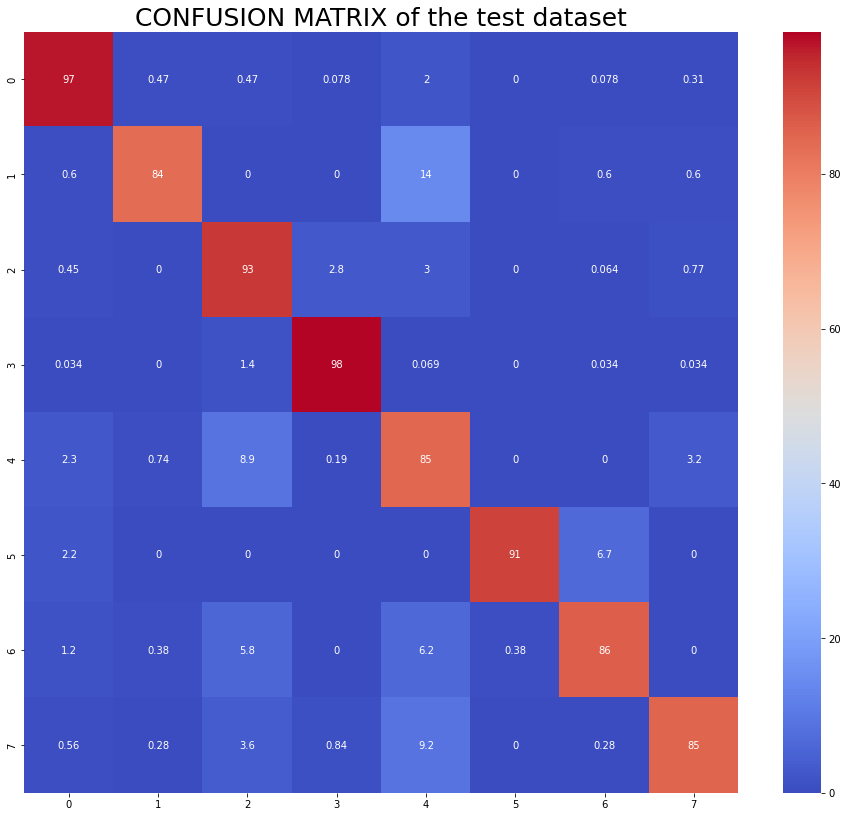

In [55]:
y_true = y_test
y_pred = classifier_filp.predict(x_test)
plt.figure(figsize=(16,14))
sns.heatmap(confusion_matrix(encoder.inverse_transform(y_true), 
                             encoder.inverse_transform(y_pred.argmax(axis=1)), 
                             normalize = 'true')*100, annot = True, cmap='coolwarm')
plt.title("CONFUSION MATRIX of the test dataset", fontsize=25)
plt.show()

In [56]:
f1_score(y_true, y_pred.argmax(axis=1), average = None)

array([0.96734059, 0.86604361, 0.91155178, 0.98347676, 0.85353299,
       0.94252874, 0.91056911, 0.85195531])

## RESNET